# Credit Decision Model - Tasks Description

## Task 1 – Build a Model to Predict Credit Default

- Development data (`Development_sample.csv`) – dataset for developing (training) your models.
- Testing data (`Testing_sample.csv`) – dataset for testing the performance of your models.


**Please complete the task using Python or Julia programming languages.**

### Task 1.1 – Logistic Regression Task

1. Describe the dataset (e.g., descriptive statistics, missing values, target rate).
2. Describe the feature engineering procedure and the data treatments you followed (if any).
3. Describe the model selection process you applied (e.g., criteria for feature selection, estimation technique of the model parameters).
4. Explain the final model in terms of statistical results and business interpretation of regression coefficients.
5. Present the assumptions of the logistic regression and check if they are fulfilled by your model.
6. Calculate the following performance metrics: Accuracy, Precision, Recall, and F1 score both in Testing and Training samples.
7. Create the ROC curve (AUC) and explain the discriminatory power of the model both in Testing and Training samples.



# 1. EDA
This section of the project focuses on the initial stage of exploring and understanding the dataset related to credit default risk, a crucial step in developing effective risk assessment models for financial institutions. The Exploratory Data Analysis (EDA) serves as the groundwork for identifying key factors that influence the likelihood of loan defaults, enabling the creation of more accurate and reliable predictive models. Here's a breakdown focused on the economic implications:

1. **Understanding the Dataset**: The initial step involves loading and examining the dataset to grasp the nature of the data, including the types of variables present (e.g., loan amounts, income levels, credit scores) and their potential impact on loan default risk. This understanding is vital for identifying which economic factors are most relevant in predicting defaults.

2. **Data Cleaning and Preparation**: Adjusting display settings and renaming columns based on a standardized description enhances clarity and facilitates easier analysis. The renaming process, guided by economic and financial terminology, ensures that the dataset variables are accurately represented, reflecting their role in the context of credit risk assessment (e.g., applicant income, loan purpose).

3. **Identification of Key Economic Indicators**: Through basic exploration and visualization, the analysis aims to highlight significant economic indicators within the data, such as income stability, debt-to-income ratios, credit history, and other factors that traditionally influence creditworthiness. Understanding the distribution and interaction of these variables helps in pinpointing patterns or trends that are crucial for assessing default risk.

4. **Visual Exploration of Economic Trends**: The use of visualization tools enables the identification of key economic trends and relationships within the dataset. For instance, plotting income levels against default rates could reveal insights into how financial stability impacts loan repayment behavior.

5. **Feature Engineering for Economic Insights**: The creation of interaction features involves combining existing variables to form new indicators that might offer deeper insights into default risk from an economic perspective. For example, an interaction feature between loan amount and applicant income could help in understanding the burden of the loan relative to the borrower's financial capacity, which is a critical factor in default risk.

The primary goal of this EDA phase is not just to prepare the data for modeling but also to uncover economic insights that can inform the development of more nuanced and effective credit risk models. By focusing on the economic aspects of the data, the analysis seeks to build a foundation for predictive models that accurately reflect the complexities of financial behavior and loan repayment patterns.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

def rename_df_from_desc(df_to_rename, desc):
    desc['Description'] = desc['Description'].str.replace(r'\([^)]*\)', '', regex=True).str.replace(' ', '_').str.replace("Application_data:_","").apply(lambda x: x.rstrip('_'))

    if len(desc.iloc[3,1]) > 67:
        temp = df_desc.iloc[3,1][67:]
        desc.iloc[3,1] = temp

    rename_dict = {}
    for index,row in desc.iterrows():
        if index != 3:
            rename_dict[row.iloc[0]] = row.iloc[1]
    df_to_rename = df_to_rename.rename(columns=rename_dict)
    return df_to_rename

## First look at description

In [2]:
df_desc = pd.read_excel('variables_description.xlsx')
print("Description of DataFrames")
pd.concat([df_desc.iloc[:18],df_desc.iloc[18:].reset_index(drop=True)],axis=1)

Description of DataFrames


,Column,Description,Column,Description
0,id,Application ID,Var14,Application data: marital status of main applicant
1,customer_id,Customer ID,Var15,Application data: number of children of main applicant
2,application_date,Application date,Var16,Application data: number of dependences of main applicant
3,target,Default indicator\n1. loan went into default\n0. facility performing\nMissing for rejected applications,Var17,Spendings estimation
4,application_status,Application status (Approved/Rejected),Var18,Property ownership for property renovation
5,Var1,Number of applicants,Var19,"Clasification of the vehicle (Car, Motorbike)"
6,Var2,Loan purpose,Var20,Number of requests during the last 3 months (External data)
7,Var3,Distribution channel,Var21,Number of requests during the last 6 months (External data)
8,Var4,Application amount,Var22,Number of requests during the last 9 months (External data)
9,Var5,Credit duration (months),Var23,Number of requests during the last 12 months (External data)


## First look at dataframe

In [3]:
df = pd.read_csv('development_sample.csv')
test_data_df = pd.read_csv('testing_sample.csv')
test_data_df.head()

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,_r_
0,36034977,32653719,03Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4800,15,1,463.31,NaN,4200,NaN,2,NaN,28Nov2004,0,1,1,2436.83,NaN,NaN,2,8,8,8,0,4977.87,14880.28,0,0,70,3899,0.485674
1,36034978,32832365,04Feb2010 0:00:00,0.0,Approved,2,2.0,1.0,6800,18,6,3170.40,NaN,5880,3700.0,5,6.0,19Sep1996,3,0,0,4430.26,1.0,NaN,1,1,1,1,29400,7922.90,6534.84,0,0,0,3899,0.267045
2,36034979,32544742,07Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4600,18,1,355.36,NaN,4200,NaN,5,NaN,23Nov1998,0,0,0,1695.92,NaN,NaN,0,0,0,0,0,3174.15,16974.69,0,0,0,3899,0.793579
3,36034980,32395830,09Feb2010 0:00:00,NaN,Rejected,2,2.0,2.0,7900,48,1,231.34,NaN,4200,5400.0,5,5.0,13Nov2005,2,1,1,2986.63,0.0,NaN,0,0,2,2,0,4972.82,3484.36,0,0,10,3899,0.533040
4,36034981,32592943,13Feb2010 0:00:00,0.0,Approved,2,1.0,1.0,9900,63,3,639.45,11900.0,3120,3300.0,4,5.0,06Aug1995,1,0,2,3785.22,NaN,0.0,3,3,3,3,0,2278.22,9630.53,0,0,10,3899,0.781269


### Let's review type and Non-Null count of our Raw features

This section describes the process of refining the dataset for credit default prediction by removing features deemed less relevant or potentially misleading for the model. The goal is to focus on variables with a direct or significant indirect impact on the likelihood of default, thus enhancing the model's accuracy and reliability. Here's a summary of the decisions made:

- **Unique Identifiers** ('id', 'customer_id') and **Application Date** ('application_date') are removed due to their lack of predictive value and potential to cause overfitting. Identifiers do not carry information about creditworthiness, and raw application dates require complex transformations to yield meaningful insights.
  
- **Loan Purpose** ('Var2') and **Distribution Channel** ('Var3') are dropped as their impact on default risk is indirect and can be overshadowed by more direct financial indicators.
  
- **Value of the Goods** ('Var8'), suggesting the collateral's worth, and **Property Ownership for Property Renovation** ('Var18'), while financially relevant, are not straightforward predictors of default risk without context on the loan amount and borrower's financial health.
  
- **Number of Children** ('Var15') is considered redundant with **Number of Dependents** ('Var16'), leading to the decision to eliminate one to simplify the model.
  
- **Classification of the Vehicle** ('Var19') is removed, acknowledging that vehicle type more closely reflects personal preference than financial stability or risk of default.

The dataframe is then updated to exclude these variables, streamlining the feature set to those more closely aligned with predicting default risk. This approach not only simplifies the analysis but also targets the refinement of the predictive model towards economically and financially significant factors.

In [4]:
print(df.info())
print(f'We originally have {df.shape[1]} columns and {df.shape[0]} rows in development_sample')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   customer_id         50000 non-null  int64  
 2   application_date    50000 non-null  object 
 3   target              36718 non-null  float64
 4   Application_status  50000 non-null  object 
 5   Var1                50000 non-null  int64  
 6   Var2                48597 non-null  float64
 7   Var3                48597 non-null  object 
 8   Var4                50000 non-null  int64  
 9   Var5                50000 non-null  int64  
 10  Var6                50000 non-null  int64  
 11  Var7                50000 non-null  float64
 12  Var8                20827 non-null  float64
 13  Var9                50000 non-null  int64  
 14  Var10               12462 non-null  float64
 15  Var11               50000 non-null  int64  
 16  Var1

In [5]:
variables_to_remove = [
    'ID',
    'customer_id',
    'application_date',
    'Var2',
    'Var3',
    'Var8',
    'Var15',
    'Var12',
    'Var18',
    'Var19',
    '_r_'
]

In [6]:
df = df.drop(variables_to_remove,axis=1)
test_data_df = test_data_df.drop(variables_to_remove,axis=1)
df.head()

,target,Application_status,Var1,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var13,Var14,Var16,Var17,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
0,0.0,Approved,1,7800,99,1,108.73,5640,NaN,5,26Nov2004,2,0,3272.31,1,1,1,1,0,6768.42,0.00,0,0,0,3899
1,0.0,Approved,1,11100,78,1,195.99,3000,NaN,2,16Sep1996,4,4,1387.35,0,0,0,0,15000,5937.66,3870.60,0,0,0,3899
2,0.0,Approved,2,2400,15,1,248.34,6240,4300.0,5,06May1989,1,0,4703.28,1,2,2,2,0,5647.77,1463.08,0,0,10,3899
3,0.0,Approved,3,11800,30,6,3538.68,4560,2500.0,6,06Dec1987,1,0,2508.70,0,0,0,0,0,3594.90,21563.78,0,0,10,3899
4,NaN,Rejected,1,10200,72,3,580.26,5160,NaN,5,18May1989,0,4,2564.96,0,0,2,2,0,9908.45,0.00,0,0,20,3899


### We have to rename column names to what we have seen in description table, for better readabillity

In [7]:
df = rename_df_from_desc(df, df_desc)
test_data_df = rename_df_from_desc(test_data_df, df_desc)
df.head()

,target,Application_status,Number_of_applicants,Application_amount,Credit_duration,Payment_frequency,Installment_amount,income_of_main_applicant,income_of_second_applicant,profession_of_main_applicant,employment_date,marital_status_of_main_applicant,number_of_dependences_of_main_applicant,Spendings_estimation,Number_of_requests_during_the_last_3_months,Number_of_requests_during_the_last_6_months,Number_of_requests_during_the_last_9_months,Number_of_requests_during_the_last_12_months,Limit_on_credit_card,Amount_on_current_account,Amount_on_savings_account,Arrear_in_last_3_months,Arrear_in_last_12_months,Credit_bureau_score,Average_income
0,0.0,Approved,1,7800,99,1,108.73,5640,NaN,5,26Nov2004,2,0,3272.31,1,1,1,1,0,6768.42,0.00,0,0,0,3899
1,0.0,Approved,1,11100,78,1,195.99,3000,NaN,2,16Sep1996,4,4,1387.35,0,0,0,0,15000,5937.66,3870.60,0,0,0,3899
2,0.0,Approved,2,2400,15,1,248.34,6240,4300.0,5,06May1989,1,0,4703.28,1,2,2,2,0,5647.77,1463.08,0,0,10,3899
3,0.0,Approved,3,11800,30,6,3538.68,4560,2500.0,6,06Dec1987,1,0,2508.70,0,0,0,0,0,3594.90,21563.78,0,0,10,3899
4,NaN,Rejected,1,10200,72,3,580.26,5160,NaN,5,18May1989,0,4,2564.96,0,0,2,2,0,9908.45,0.00,0,0,20,3899


## Visualisation & feature engineering

### Feature Creation Ideas

This section delves into visualizing key financial indicators and creating new features aimed at enhancing the predictive power of the model for credit default risk. The focus on economic and financial dimensions underscores the significance of understanding applicants' financial health and behaviors in predicting loan defaults. Here's a brief overview of the steps taken and their economic implications:

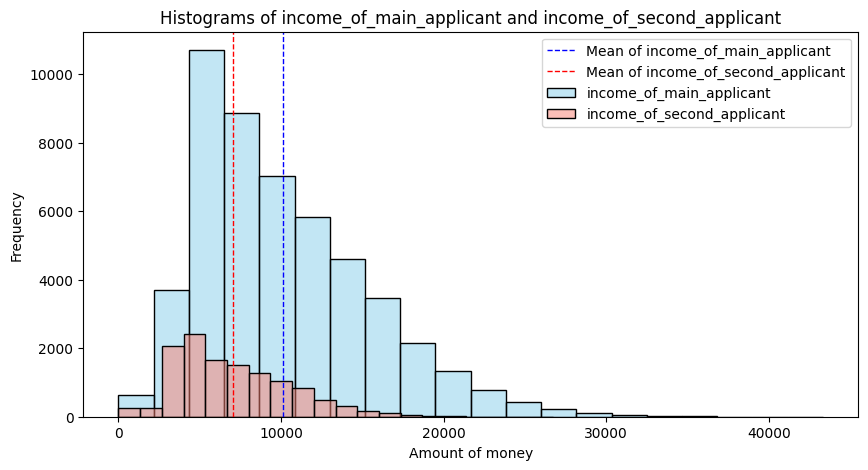

In [8]:
# Calculate means
mean_main_applicant = df['income_of_main_applicant'].mean()
mean_second_applicant = df['income_of_second_applicant'].mean()

# Plotting
plt.figure(figsize=(10, 5))

sns.histplot(df['income_of_main_applicant'], bins=20, color='skyblue', alpha=0.5, label='income_of_main_applicant')
sns.histplot(df['income_of_second_applicant'], bins=20, color='salmon', alpha=0.5, label='income_of_second_applicant')

# Add lines for means
plt.axvline(mean_main_applicant, color='blue', linestyle='dashed', linewidth=1, label='Mean of income_of_main_applicant')
plt.axvline(mean_second_applicant, color='red', linestyle='dashed', linewidth=1, label='Mean of income_of_second_applicant')

plt.xlabel('Amount of money')
plt.ylabel('Frequency')
plt.title('Histograms of income_of_main_applicant and income_of_second_applicant')
plt.legend()

plt.show()

## Total Household Income

This feature aggregates the incomes of the main and second applicants, providing a comprehensive view of the household's financial resources. It's a fundamental indicator of repayment capacity.


In [9]:
# income_of_second_applicant NaN value probably means that there is no second applicant so, we will replace NaN value with 0
df['income_of_second_applicant'] = df['income_of_second_applicant'].fillna(0)
test_data_df['income_of_second_applicant'] = test_data_df['income_of_second_applicant'].fillna(0)
if df['income_of_second_applicant'].isna().any() == df['income_of_main_applicant'].isna().any():
    print("We can merge both values to get new feature")

df['Household_income'] = df['income_of_second_applicant'] + df['income_of_main_applicant']
test_data_df['Household_income'] = test_data_df['income_of_second_applicant'] + test_data_df['income_of_main_applicant']
print("We now have household income, so let's get rid of component features: income_of_second_applicant and income_of_main_applicant")

df = df.drop('income_of_main_applicant',axis=1)
df = df.drop('income_of_second_applicant',axis=1)
test_data_df = test_data_df.drop('income_of_main_applicant',axis=1)
test_data_df = test_data_df.drop('income_of_second_applicant',axis=1)
df.head()

We can merge both values to get new feature
We now have household income, so let's get rid of component features: income_of_second_applicant and income_of_main_applicant


,target,Application_status,Number_of_applicants,Application_amount,Credit_duration,Payment_frequency,Installment_amount,profession_of_main_applicant,employment_date,marital_status_of_main_applicant,number_of_dependences_of_main_applicant,Spendings_estimation,Number_of_requests_during_the_last_3_months,Number_of_requests_during_the_last_6_months,Number_of_requests_during_the_last_9_months,Number_of_requests_during_the_last_12_months,Limit_on_credit_card,Amount_on_current_account,Amount_on_savings_account,Arrear_in_last_3_months,Arrear_in_last_12_months,Credit_bureau_score,Average_income,Household_income
0,0.0,Approved,1,7800,99,1,108.73,5,26Nov2004,2,0,3272.31,1,1,1,1,0,6768.42,0.00,0,0,0,3899,5640.0
1,0.0,Approved,1,11100,78,1,195.99,2,16Sep1996,4,4,1387.35,0,0,0,0,15000,5937.66,3870.60,0,0,0,3899,3000.0
2,0.0,Approved,2,2400,15,1,248.34,5,06May1989,1,0,4703.28,1,2,2,2,0,5647.77,1463.08,0,0,10,3899,10540.0
3,0.0,Approved,3,11800,30,6,3538.68,6,06Dec1987,1,0,2508.70,0,0,0,0,0,3594.90,21563.78,0,0,10,3899,7060.0
4,NaN,Rejected,1,10200,72,3,580.26,5,18May1989,0,4,2564.96,0,0,2,2,0,9908.45,0.00,0,0,20,3899,5160.0


In [10]:
df['Household_income'].isna().any() # it worked !!

False

### Relation between 'target' and 'household_income'



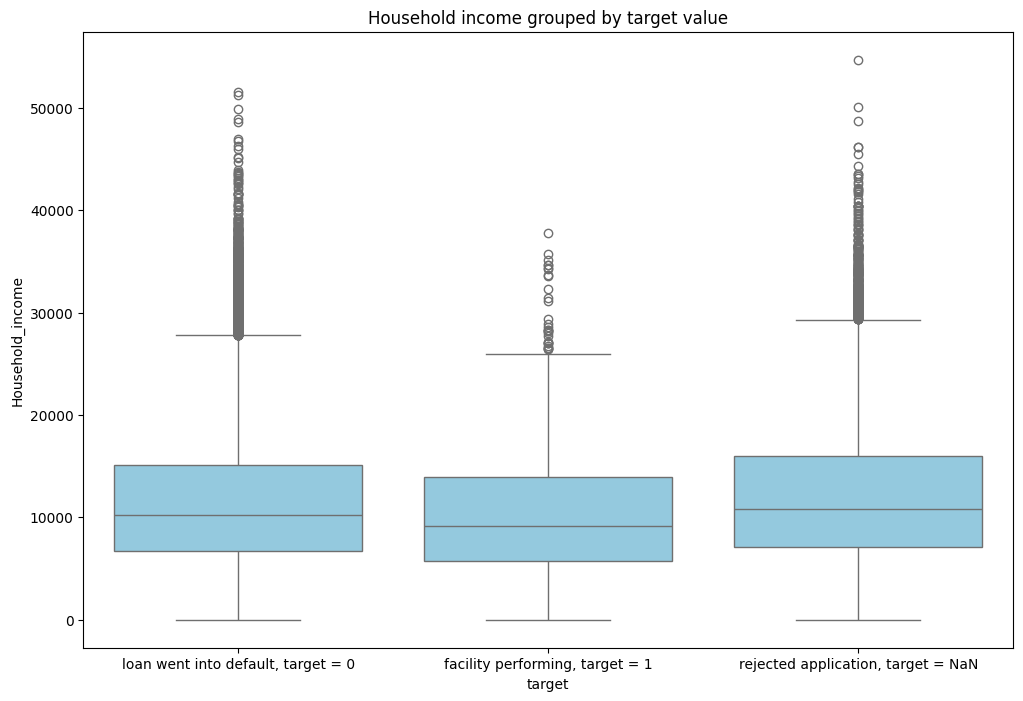

In [11]:
def feature_box_plot_grouped_by_target(df,title,feature_name):
    plt.figure(figsize=(12, 8))
    temp_df = df.copy()
    temp_df['target'] = temp_df['target'].fillna(2)
    sns.boxplot(data = temp_df,x = 'target', y=feature_name,color='skyblue' )
    plt.title(title)
    target_labels = ['loan went into default, target = 0', 'facility performing, target = 1', 'rejected application, target = NaN']  # Replace with your comments
    plt.xticks(ticks=plt.xticks()[0], labels=target_labels)
    plt.show()
feature_box_plot_grouped_by_target(df,'Household income grouped by target value','Household_income')

### Debt-to-Income Ratio

By comparing the loan amount (debt) to the total household income, this ratio offers insights into the financial burden the loan represents, highlighting households potentially at risk of financial strain.

In [12]:
if df['Application_amount'].isna().any() == df['Household_income'].isna().any():
    print("We can merge both values to get new feature")
df['Debt_to_income_ratio'] = df['Application_amount'] / df['Household_income']
test_data_df['Debt_to_income_ratio'] = test_data_df['Application_amount'] / test_data_df['Household_income']
df = df.loc[df['Debt_to_income_ratio'] != np.inf]
test_data_df = test_data_df.loc[test_data_df['Debt_to_income_ratio'] != np.inf]


We can merge both values to get new feature


### Relation between 'target' and 'Debt_to_income_ratio'

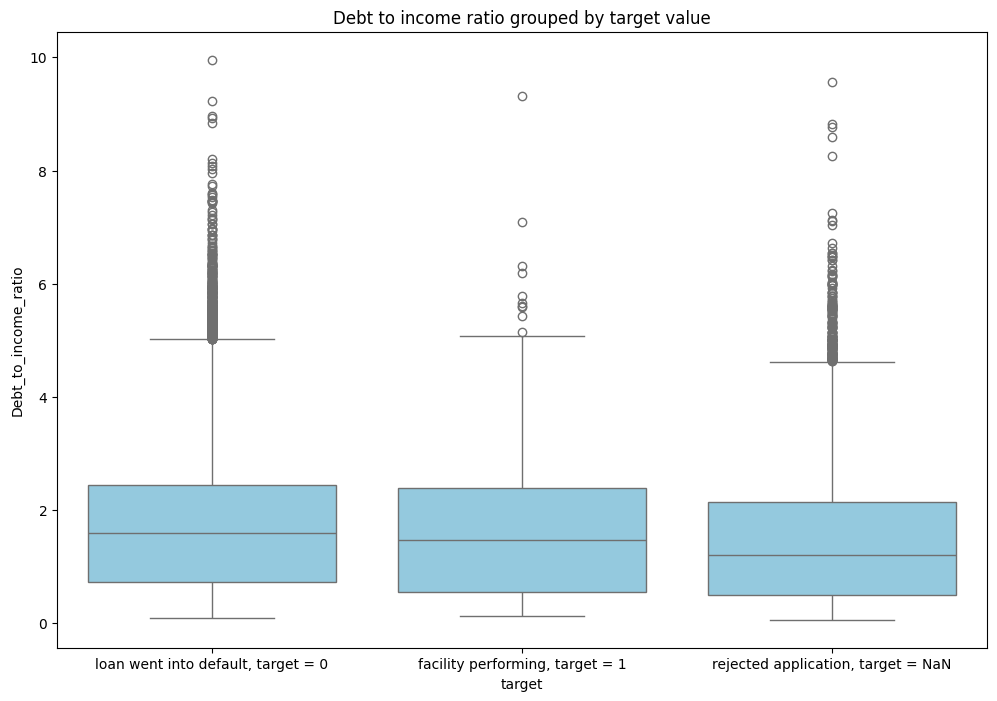

In [13]:
feature_box_plot_grouped_by_target(df,'Debt to income ratio grouped by target value','Debt_to_income_ratio')

### Credit Utilization

This metric evaluates how much of the available credit (credit card limits plus account balances) is being used, serving as a proxy for financial management and liquidity.

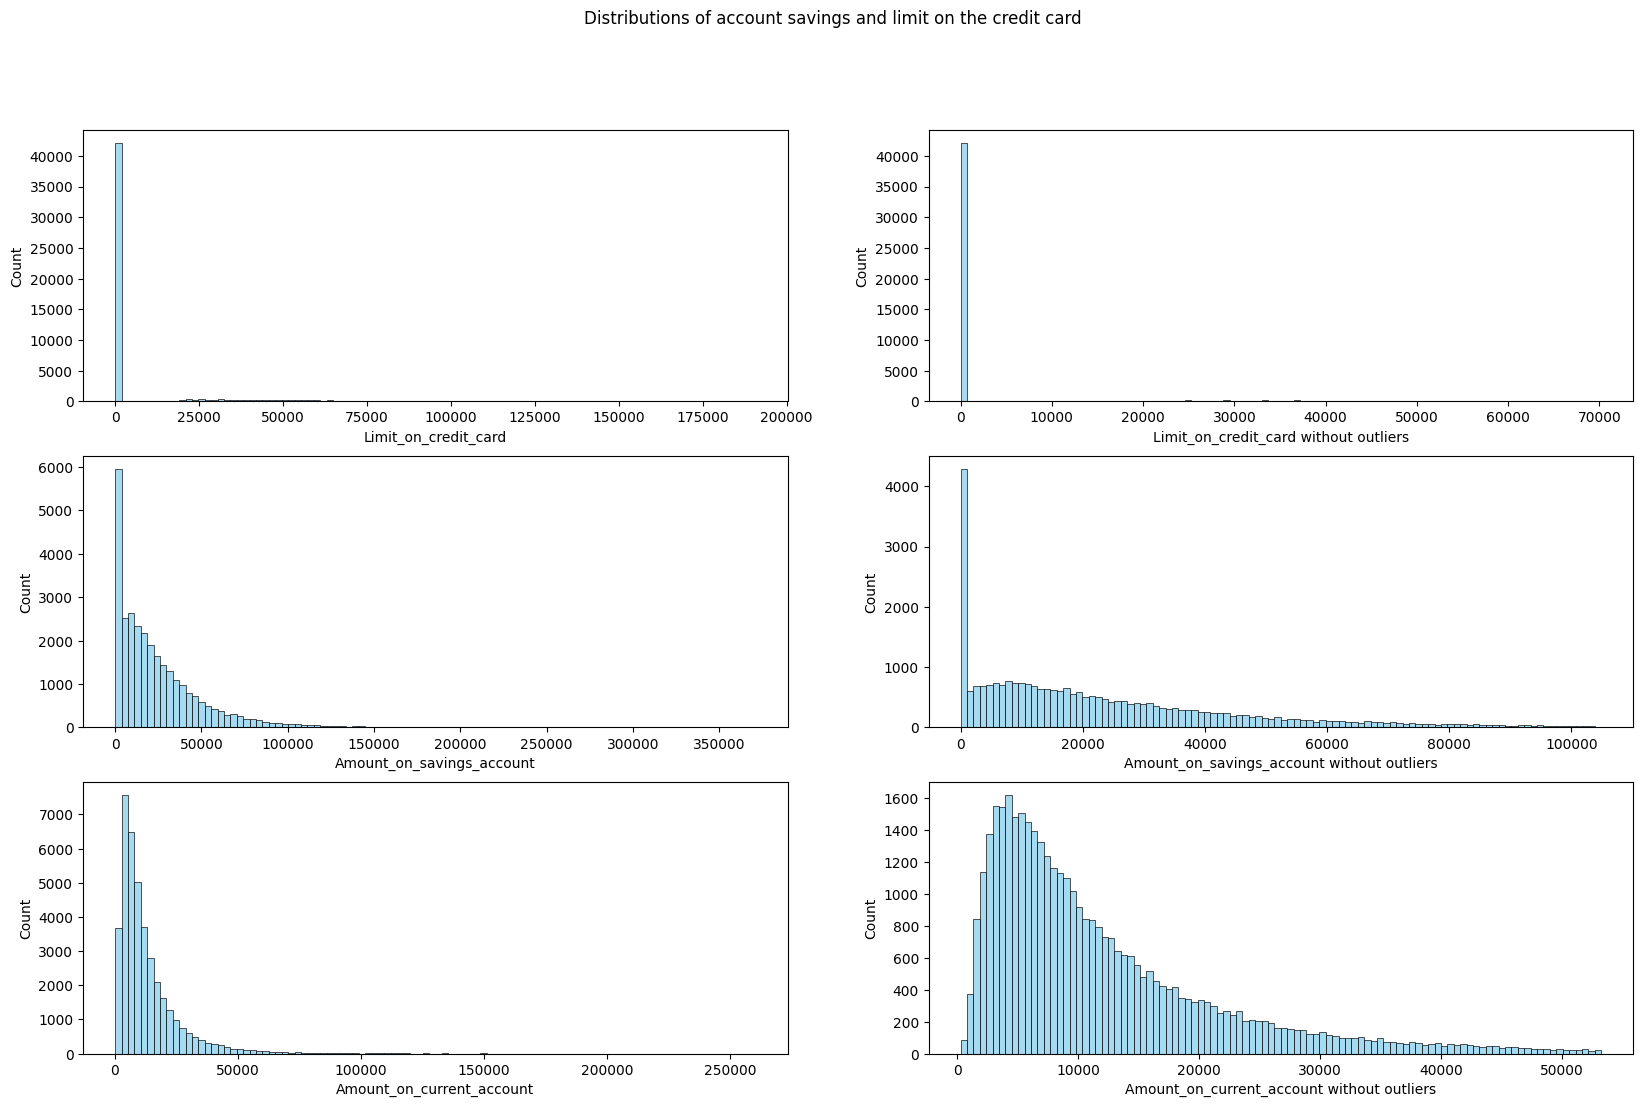

In [14]:
fig,((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(20,12))

ax_list = [ax1,ax3,ax5]
name_list = ['Limit_on_credit_card','Amount_on_savings_account','Amount_on_current_account']

for axes, name in zip(ax_list,name_list):
    g = sns.histplot(df[name],bins=100,ax=axes,color = 'skyblue')


ax_list = [ax2,ax4,ax6]
for axes, name in zip(ax_list,name_list):
    z_scores = (df[name] - df[name].mean()) / df[name].std()
    threshold = 3
    df_non_outliers = df[abs(z_scores) <= threshold]
    g = sns.histplot(df_non_outliers[name],bins=100,ax=axes,color = 'skyblue')
    g.set_xlabel(f'{name} without outliers')
    # g.set(xlim=(0,200000),ylim=(0,50000))
plt.suptitle("Distributions of account savings and limit on the credit card")
plt.show()

In [15]:
print("NaN and 0 values count of Limit_on_credit_card:",df['Limit_on_credit_card'].isna().sum() + sum(df['Limit_on_credit_card'] == 0))
print("NaN and 0 values count of Amount_on_current_account:",df['Amount_on_current_account'].isna().sum() + sum(df['Amount_on_current_account'] == 0))
print("NaN and 0 values count of Amount_on_savings_account:",df['Amount_on_savings_account'].isna().sum() + sum(df['Amount_on_savings_account'] == 0))

print("Based on these metrics and histograms above we decided to get rid of Limit_on_credit_card feature, and create new feature 'Total_account_amount', simultaneously we get rid of componenet features")
print("But we have to bear in mind that many values are NaN, so we will fill them out with median")

df = df.drop('Limit_on_credit_card',axis=1)
test_data_df = test_data_df.drop('Limit_on_credit_card',axis=1)

df['Amount_on_savings_account'] = df['Amount_on_savings_account'].fillna(df['Amount_on_savings_account'].median())
df['Amount_on_current_account'] = df['Amount_on_current_account'].fillna(df['Amount_on_current_account'].median())

test_data_df['Amount_on_savings_account'] = test_data_df['Amount_on_savings_account'].fillna(test_data_df['Amount_on_savings_account'].median())
test_data_df['Amount_on_current_account'] = test_data_df['Amount_on_current_account'].fillna(test_data_df['Amount_on_current_account'].median())

df['Total_account_amount'] = df['Amount_on_savings_account'] + df['Amount_on_current_account']
test_data_df['Total_account_amount'] = test_data_df['Amount_on_savings_account'] + test_data_df['Amount_on_current_account']

df = df.drop('Amount_on_savings_account',axis=1)
test_data_df = test_data_df.drop('Amount_on_savings_account',axis=1)
df = df.drop('Amount_on_current_account',axis=1)
test_data_df = test_data_df.drop('Amount_on_current_account',axis=1)


NaN and 0 values count of Limit_on_credit_card: 42172
NaN and 0 values count of Amount_on_current_account: 9990
NaN and 0 values count of Amount_on_savings_account: 23395
Based on these metrics and histograms above we decided to get rid of Limit_on_credit_card feature, and create new feature 'Total_account_amount', simultaneously we get rid of componenet features
But we have to bear in mind that many values are NaN, so we will fill them out with median


### Relationship between loan default (target variable) and arrears in the last 3 and 12 months.

This brief snippet creates histograms to visually examine the relationship between loan default (target variable) and arrears in the last 3 and 12 months. The use of varying opacity levels (alpha parameter) for each histogram helps differentiate between these three crucial variables within a single plot. Here's a simplified explanation of what this visualization aims to achieve and the insights it might offer:

1. **Arrear in Last 3 Months**: This histogram shows the distribution of borrowers who have fallen behind on their payments within the last 3 months. A higher frequency of arrears could indicate recent financial distress among borrowers.

2. **Arrear in Last 12 Months**: By displaying the distribution of arrears over a longer period (12 months), this histogram provides insights into longer-term financial stability or distress among the borrowers.

3. **Target Variable (Loan Default)**: The histogram for the target variable, which indicates whether a loan has defaulted, allows for a comparison against the arrears distributions to understand if there's a visible pattern or correlation between arrears and defaults.

Plotting these histograms together enables a quick visual assessment of how recent and past financial difficulties (as indicated by arrears) may correlate with the likelihood of loan default. This kind of visualization is key in the early stages of model development to identify potential predictive features and understand the economic behaviors underlying loan defaults.

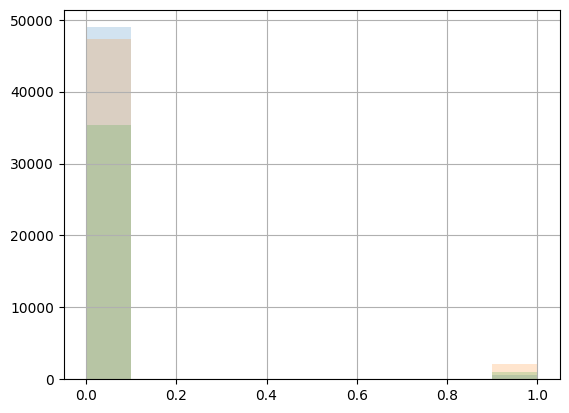

In [16]:
df['Arrear_in_last_3_months'].hist(alpha=.2)
df['Arrear_in_last_12_months'].hist(alpha=.2)
df['target'].hist(alpha=.2)
plt.show()

### Years of employment feature engineering

In this phase of feature engineering, the focus is on transforming the employment date into a more analytically valuable metric: the years of employment. This process enhances the dataset by converting raw dates into a continuous variable that reflects the duration of an applicant's employment, offering deeper insights into their financial stability and work history. Here’s an overview of the steps taken and their economic significance:

### Transformation Process

1. **Conversion to Datetime**: The employment date is first converted from a string format to a datetime object using pandas' `to_datetime` function. This step is essential for enabling subsequent mathematical operations on the dates.

2. **Calculation of Years of Employment**: The difference between the current date and the employment start date is calculated, then converted from days to years. This results in a new feature, `years_of_employment`, which quantifies the length of time an individual has been employed up to the present day.

3. **Removal of Original Date Feature**: After extracting the needed information, the original `employment_date` column is dropped from the dataset to avoid redundancy and focus on the more insightful `years_of_employment` feature.

### Economic Implications

The `years_of_employment` feature is a significant economic indicator within the context of credit risk modeling. A longer employment history can be indicative of job stability and financial reliability, traits that are positively correlated with an individual’s ability to consistently meet loan repayment obligations. Conversely, a shorter employment duration may signal potential financial instability or a higher risk of income interruption, factors that could affect loan default risk.

### Application in Predictive Modeling

Incorporating the years of employment into the model provides a nuanced view of an applicant's economic background, enhancing the model's ability to assess creditworthiness more accurately. This feature engineering step reflects a key principle in credit risk analysis: understanding the borrower's financial history and stability is crucial for predicting their future loan repayment behavior.

This transformation exemplifies how raw data can be refined into meaningful predictors that reflect underlying economic realities, thereby improving the predictive power and economic relevance of the credit default risk model.

In [17]:
from datetime import datetime
df['employment_date'] = pd.to_datetime(df['employment_date'],
 format = '%d%b%Y',
 errors = 'coerce')
df['years_of_employment'] = (datetime.now() - df['employment_date']).dt.days / 365.25
df = df.drop('employment_date',axis=1)

test_data_df['employment_date'] = pd.to_datetime(test_data_df['employment_date'],
 format = '%d%b%Y',
 errors = 'coerce')
test_data_df['years_of_employment'] = (datetime.now() - test_data_df['employment_date']).dt.days / 365.25
test_data_df = test_data_df.drop('employment_date',axis=1)

# Logistic Regression

In transitioning to the model development phase, particularly focusing on Logistic Regression for predicting credit defaults, several preparatory steps are undertaken to refine the dataset further, ensuring it's well-suited for modeling. Here’s a breakdown of these steps and their rationale:

### Data Preparation

1. **Filtering Applications**: The dataset is filtered to exclude records where the application status is "Rejected." This step focuses the analysis on approved applications, as the model's objective is to predict defaults among approved loans.

2. **Dropping Redundant Column**: After filtering, the `Application_status` column becomes redundant since it holds a single value ("Approved") for all remaining records. Therefore, it's dropped to simplify the dataset.

3. **Splitting Dataset**: The dataset is split into dependent (target variable) and independent variables (features). The target variable is typically the default indicator, while the features include various borrower and loan characteristics.

### Analytical Preparations

4. **Evaluating Correlation**: Analyzing the correlation between independent variables helps identify any multicollinearity issues, where highly correlated predictors could undermine the model's performance and interpretability.

5. **Handling Missing Data**: Missing values are addressed using pipelines that can include strategies like imputation, where missing entries are filled based on other data points (e.g., using mean or median for numerical variables). This step ensures the model has a complete dataset to work with, avoiding biases or errors due to missing information.

### Model Deployment

6. **Logistic Regression Model**: With the data prepared, a Logistic Regression model is deployed. This model type is chosen for its ability to estimate probabilities of binary outcomes (e.g., default vs. non-default) based on the input features. Logistic Regression is particularly suited for credit default prediction due to its interpretability and effectiveness in handling binary classification problems.

7. **Training and Testing**: The model is trained on a portion of the dataset and then tested on another set to evaluate its predictive accuracy, ensuring that it generalizes well to new, unseen data.

8. **Evaluation and Iteration**: Model performance is assessed using appropriate metrics (e.g., accuracy, AUC-ROC). Insights from the evaluation phase may lead to further data preprocessing, feature engineering, or model tuning to improve outcomes.

This systematic approach to preparing the dataset and deploying a Logistic Regression model lays the groundwork for developing a robust tool for predicting credit default risks. By focusing on approved loan applications and refining the dataset through strategic preprocessing and feature engineering steps, the model aims to provide accurate and actionable predictions that can inform lending decisions and risk management strategies.

### Removing rejected applications

In [18]:
df = df.query('Application_status != "Rejected"')
test_data_df = test_data_df.query('Application_status != "Rejected"')
df = df.drop('Application_status',axis=1)
test_data_df = test_data_df.drop('Application_status',axis=1)

### Splitting dataframe into two sets for machine learning

In [19]:
y_train = df['target'].copy()
X = df.drop('target',axis=1)

y_test = test_data_df['target'].copy()
X_test = test_data_df.drop('target',axis=1)

categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

median_imputer = SimpleImputer(strategy='median')
min_max_scaler = MinMaxScaler()

numerical_pipeline = Pipeline([
    ('imputer', median_imputer),
    ('scaler', min_max_scaler)
])

column_transformer = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features)
    ],
    verbose_feature_names_out=False
)

X_train = column_transformer.fit_transform(X)
X_train_df = pd.DataFrame(X_train, columns=numerical_features)

X_test = column_transformer.transform(X_test)
X_test_df = pd.DataFrame(X_test, columns=numerical_features)

### Review correlation matrix

In this step, the focus is on reviewing the correlation matrix for the training dataset, which is an essential part of the data preparation process for predictive modeling. Here's a simplified overview of this task and its significance:

Creating the Correlation Matrix: The correlation matrix is generated using the .corr() method on the dataset, which calculates the Pearson correlation coefficients between all pairs of features. This statistical measure helps identify the degree to which variables move together.
Visualization with Heatmap: The matrix is visualized as a heatmap using Seaborn's sns.heatmap function, which provides an intuitive color-coded representation of the correlation values. The use of the 'viridis' colormap and annotation (annot=True) enhances readability, allowing for quick identification of highly correlated variables.
Interpretation: The coefficients range from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate no linear correlation. High correlation (both positive and negative) between features can signal potential multicollinearity issues, which might affect the model's performance and interpretation.
Actionable Insights: Identifying highly correlated features is crucial because it can inform decisions to modify the feature set, such as by combining correlated variables into a single feature or removing one of a pair of highly correlated variables. This step helps ensure the model is built on a set of independent predictors, improving its reliability and the accuracy of predictions.

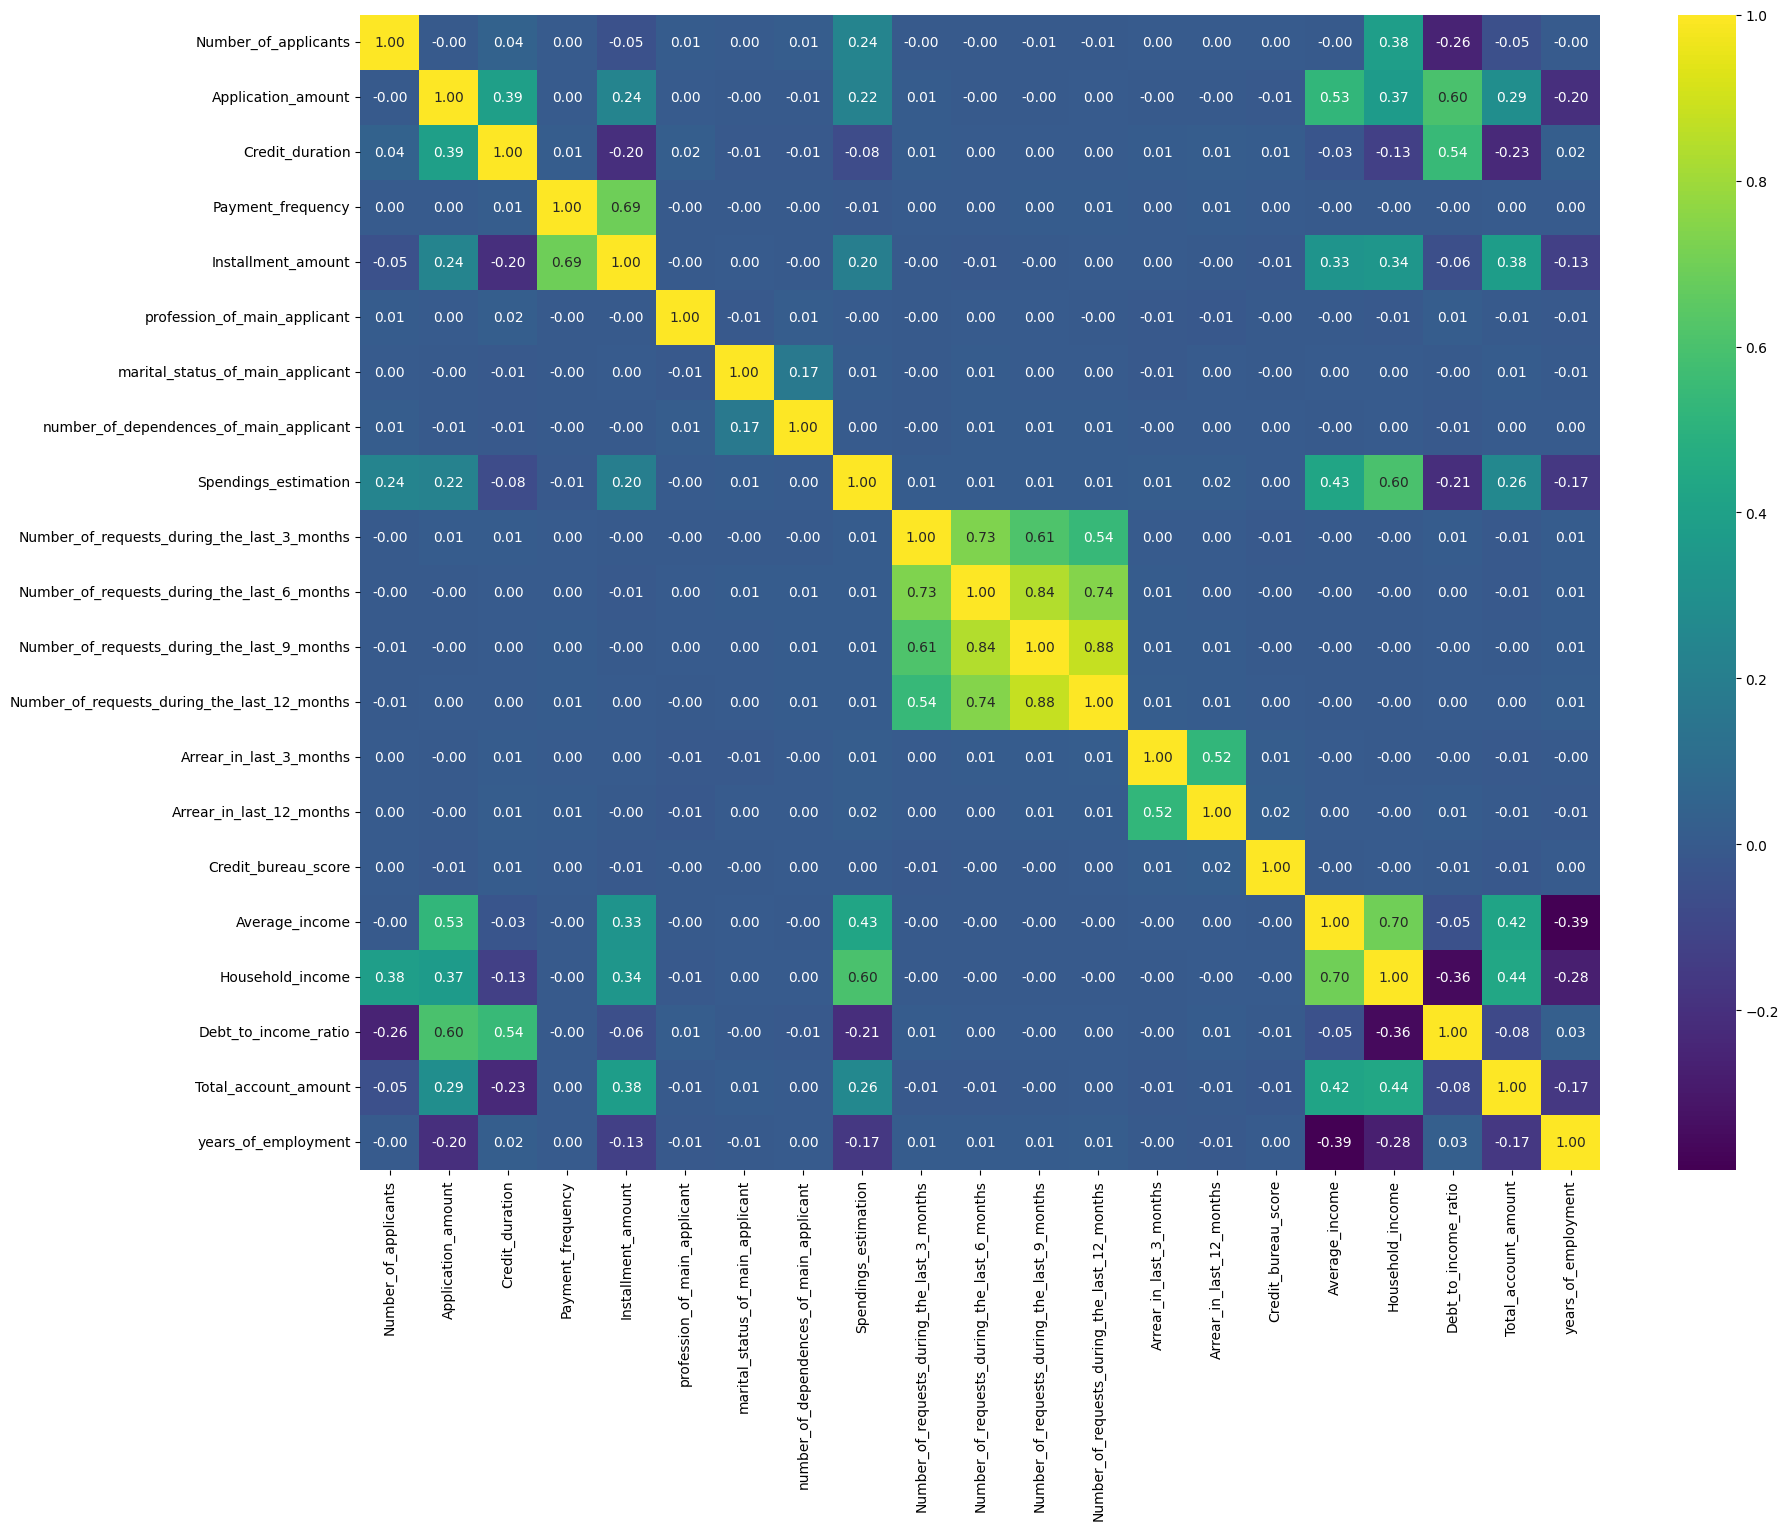

In [21]:
correlation_matrix = X_train_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.show()

### Removing highly correlated features



In [22]:
from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.69)

X_train = tr.fit_transform(X_train_df)
X_test = tr.transform(X_test_df)

print(f"Dropped features: {tr.features_to_drop_}")


Dropped features: {'Household_income', 'Number_of_requests_during_the_last_12_months', 'Number_of_requests_during_the_last_6_months', 'Installment_amount'}


### Training a Logistic Regression model

This code snippet outlines the process of training a Logistic Regression model to predict credit defaults and evaluating its performance. Here's a concise breakdown of the steps and their purpose:

Model Training:
The LogisticRegression classifier is initialized with specific parameters: class_weight="balanced" to handle imbalanced classes, penalty=None indicating no regularization, random_state=0 for reproducibility, and max_iter=500 for the maximum number of iterations for solver convergence.
The model is trained on the training set (X_train, y_train).
Prediction:
The trained model is used to predict the outcomes (y_pred) on the test dataset (X_test).
Performance Evaluation:
The performance of the model is evaluated using several metrics: precision, recall, F1 score, and accuracy. These metrics provide a comprehensive view of the model's predictive capabilities:
Precision measures the proportion of true positive predictions in all positive predictions, indicating the model's accuracy in identifying defaults.
Recall (or sensitivity) assesses how well the model identifies actual defaults.
F1 Score is the harmonic mean of precision and recall, offering a balance between the two metrics.
Accuracy reflects the overall correctness of the model across both classes.
Results Output:
The calculated metrics are printed, providing a quantitative assessment of the model's performance in predicting credit defaults.
By balancing the class weights and focusing on multiple evaluation metrics, this approach ensures a robust assessment of the model's ability to accurately and reliably predict defaults, addressing both the needs of correctly identifying defaults and minimizing false positives.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
logistic_regression_model = LogisticRegression(class_weight = "balanced", penalty = None, random_state = 0, max_iter=500)
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Celność: {accuracy:.2f}%")
print(f"Precyzja: {precision:.2f}%")
print(f"Czułość: {recall:.2f}%")
print(f"Miara F1: {f1:.2f}%")

Celność: 75.70%
Precyzja: 7.37%
Czułość: 56.90%
Miara F1: 13.04%


### Model Training
- A Logistic Regression model is trained with balanced class weights to account for potential class imbalance, without regularization (`penalty=None`), a specific `random_state` for reproducibility, and a set maximum iteration limit.

### Making Predictions
- The model makes predictions on both the training and testing datasets. For the testing dataset, it provides both the class predictions (`y_pred_test`) and the probabilities (`y_prob_test`) of the positive class. The probabilities for the training dataset (`y_prob_train`) are also calculated for further evaluation.

### Evaluation Metrics
- Key performance metrics are calculated for the testing data: precision, recall, F1 score, and accuracy. These metrics offer insights into the model's effectiveness in identifying defaults accurately.
- The Area Under the Receiver Operating Characteristic curve (AUC) for both testing and training data is computed. AUC is a performance measurement for the classification problems at various threshold settings, indicating the model's ability to discriminate between the positive and negative classes.

### Visualization with ROC Curves
- ROC curves for both testing and training data are plotted, showing the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) at different thresholds. The AUC values are included in the plot titles as a measure of the model's overall discriminatory power.
- The `plt.plot` function is used to draw the ROC curves, with dashed lines (`'k--'`) indicating a no-discrimination line (an AUC of 0.5), and the solid lines representing the model's performance.

### Output
- Testing and training metrics are printed, providing a quantitative evaluation of the model's performance. The ROC curves visually compare the model's ability to distinguish between classes under various threshold settings, with higher AUC values indicating better performance.

This comprehensive approach to model training, evaluation, and visualization helps in understanding the Logistic Regression model's predictive power and its generalization ability across unseen data, guiding improvements and iterations in the modeling process.

Testing Metrics:
Celność: 75.70%
Precyzja: 7.37%
Czułość: 56.90%
Miara F1: 13.04%
AUC: 0.71


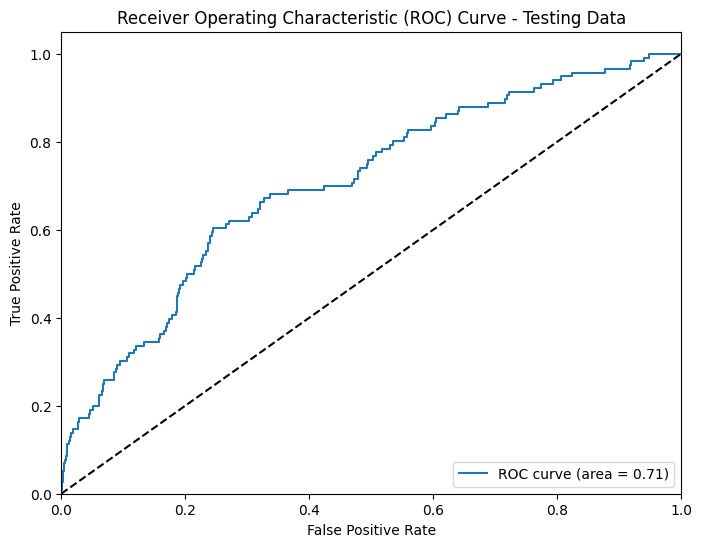

\Testing AUC: 0.7053568793349403


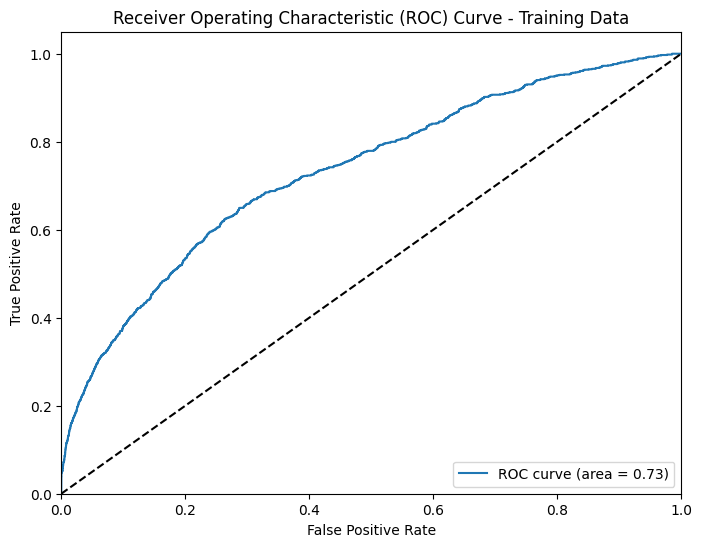

Training AUC: 0.7326520653071884


In [24]:
# Train Logistic Regression model
logistic_regression_model = LogisticRegression(class_weight="balanced", penalty=None, random_state=0, max_iter=500)
logistic_regression_model.fit(X_train, y_train)

# Predictions on testing data
y_pred_test = logistic_regression_model.predict(X_test)
y_prob_test = logistic_regression_model.predict_proba(X_test)[:, 1]

# Predictions on training data (to calculate training AUC)
y_prob_train = logistic_regression_model.predict_proba(X_train)[:, 1]

# Calculate evaluation metrics for testing data
precision_test = precision_score(y_test, y_pred_test) * 100
recall_test = recall_score(y_test, y_pred_test) * 100
f1_test = f1_score(y_test, y_pred_test) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100

# Calculate AUC for testing data
auc_test = roc_auc_score(y_test, y_prob_test)

# Calculate AUC for training data
auc_train = roc_auc_score(y_train, y_prob_train)

print("Testing Metrics:")
print(f"Celność: {accuracy_test:.2f}%")
print(f"Precyzja: {precision_test:.2f}%")
print(f"Czułość: {recall_test:.2f}%")
print(f"Miara F1: {f1_test:.2f}%")
print(f"AUC: {auc_test:.2f}")

# # Plot ROC curve for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Testing Data')
plt.legend(loc="lower right")
plt.show()

print("\Testing AUC:", auc_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

print("Training AUC:", auc_train)

# Task 1.2

This part is designed to compare various machine learning algorithms to find the most effective model for predicting credit defaults based on recall and precision metrics. Here's a brief overview of the process:

### Setup and Model Preparation
- The script imports necessary tools for splitting the data, evaluating models, and conducting grid searches to optimize parameters.
- Several classifier models from `sklearn` and `XGBoost` are prepared for comparison: Logistic Regression, Linear Discriminant Analysis, K-Nearest Neighbors, Decision Tree, Gaussian Naive Bayes, Random Forest, Support Vector Machine, and XGBoost Classifier.

### Model Evaluation
- The models are evaluated using a K-Fold cross-validation method (`KFold`) with 10 splits, which divides the data into 10 parts, trains on 9, and tests on the remaining 1 part, rotating until each part has been used for testing.
- Two rounds of evaluation are conducted, one focusing on **recall** (the ability of the model to find all the relevant cases within a dataset) and the other on **precision** (the ability of a classification model to identify only the relevant data points).
- For each model, the mean and standard deviation of the recall and precision scores across all folds are calculated and printed.

### Visualization
- Results are visualized using box plots for both recall and precision, allowing for a visual comparison of the models' performance variability and central tendency across the cross-validation folds.

### Insights
- This approach helps in identifying which models perform best in terms of recall and precision, offering insights into their suitability for the predictive task. High recall models are desirable if missing a positive case (default) is costly, while high precision models are preferable if false positives (predicting default when it doesn’t happen) carry higher costs.
- The box plots provide a clear visual comparison of the models' performance, highlighting those with the best balance of recall, precision, and consistency, which are crucial for a reliable credit default prediction model.

This comparative analysis is a crucial step in the model selection process, guiding the choice of the most appropriate algorithm based on the specific requirements and goals of the credit default prediction task.

In [25]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


LR: 0.025690 (0.025046)
LDA: 0.123441 (0.021730)
KNN: 0.016268 (0.013732)
CART: 0.119982 (0.025119)
NB: 0.256411 (0.032118)
RF: 0.036623 (0.018302)
SVM: 0.000000 (0.000000)
XGB: 0.065702 (0.022327)


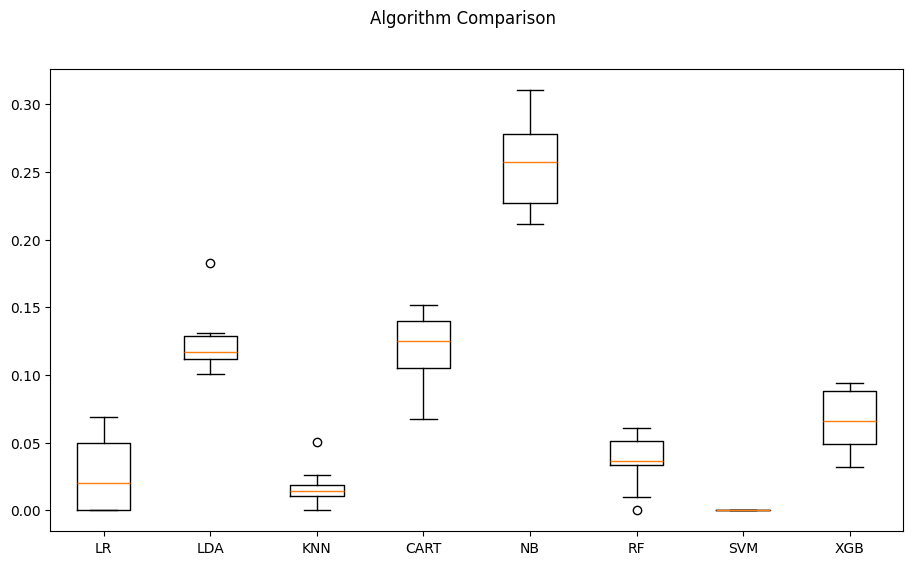

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.583333 (0.478714)
LDA: 0.251703 (0.047574)
KNN: 0.363889 (0.243575)
CART: 0.098427 (0.039500)
NB: 0.133406 (0.023048)
RF: 0.762778 (0.169714)
SVM: 0.000000 (0.000000)
XGB: 0.582469 (0.148126)


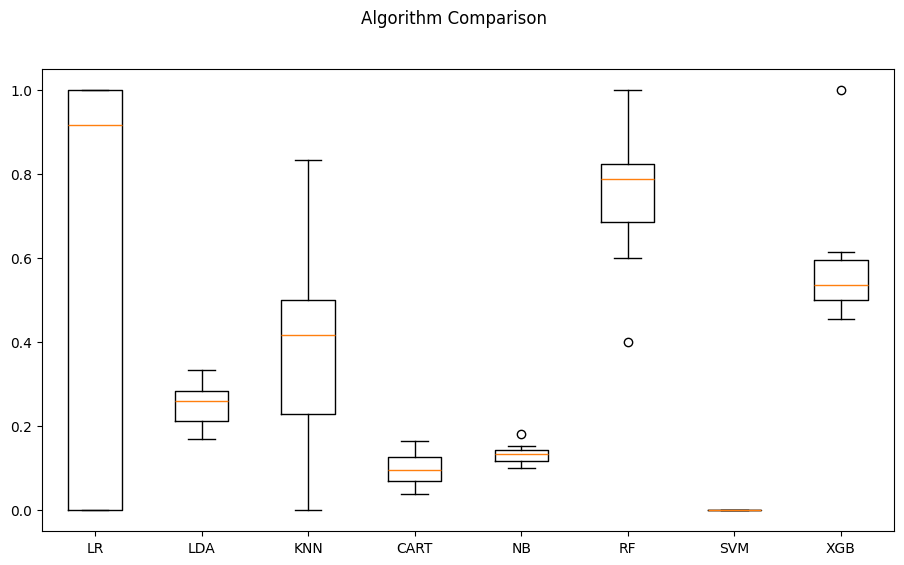

In [29]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

results = []
names = []
scoring = 'precision'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=None)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### RandomForestClassifier implementation

The implementation of a RandomForestClassifier for predicting credit defaults represents a strategic approach in financial risk management, particularly within the banking and lending sectors. This method is motivated by the need to accurately assess the likelihood of borrowers failing to repay loans, which is crucial for minimizing financial losses, optimizing loan approval processes, and maintaining a healthy credit portfolio. Let's delve into the motivations and advantages of this approach from an economic perspective:

### Economic Motivation
- **Risk Mitigation**: Accurate default predictions allow financial institutions to mitigate risks by identifying potentially risky borrowers early in the loan application process, thus reducing the incidence of loan defaults.
- **Resource Allocation**: By understanding the key drivers of default, institutions can allocate resources more effectively, focusing on clients with higher creditworthiness and adjusting loan terms to match the risk profile.
- **Portfolio Diversification**: Insights from model evaluations can guide the diversification of the loan portfolio, balancing between high-risk and low-risk loans, to optimize returns while managing default risks.

### Advantages of RandomForestClassifier
- **Robustness to Overfitting**: The ensemble approach, aggregating predictions from multiple decision trees, ensures the model is robust against overfitting, making it reliable for making predictions on unseen data.
- **Feature Importance Evaluation**: The ability to assess feature importance via MDI and permutation importance provides clear insights into which economic and financial factors most significantly influence the risk of default. This knowledge can guide feature selection and engineering efforts to improve model performance and offer strategic business insights.
- **Adaptability**: RandomForestClassifier's flexibility in handling a wide range of data types and distributions makes it suitable for the complex and often non-linear relationships inherent in financial data.
- **Hyperparameter Optimization**: Using GridSearchCV to optimize model parameters, such as `max_features`, enhances the model's predictive power. This systematic search ensures the model is fine-tuned to maximize its economic impact by improving the accuracy of default predictions.

### Economic Benefits
- **Improved Decision-making**: The model's predictions support more informed lending decisions, aligning loan approvals with the economic realities of borrowers' financial situations, thereby supporting sustainable lending practices.
- **Cost Reduction**: By reducing the frequency of defaults, the model directly contributes to lowering the costs associated with debt collection, legal proceedings, and potential write-offs.
- **Enhanced Customer Experience**: Accurate risk assessment allows for more personalized loan products that match the borrower's financial capacity, improving customer satisfaction and loyalty.

Overall, the economic rationale for employing a RandomForestClassifier in credit default prediction is deeply rooted in its potential to enhance financial stability, optimize operational efficiency, and contribute to strategic decision-making. This approach not only supports the financial institution's bottom line but also promotes a healthier credit market and financial ecosystem.